In [80]:
import numpy as np
import pandas as pd
from env import user, password, host

In [81]:
def get_db_url(user,password,host,db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

url = get_db_url(user,password,host, "telco_churn")

In [123]:
#read fie in
churn_df = pd.read_csv('cust_details_3.csv')

In [124]:
#readjust title in correctly
churn_df.columns = churn_df.iloc[0]
churn_df = churn_df.drop(churn_df.index[0])

In [185]:
#filter for month to month customers only, use the copy to preserve original data
churn_df_copy = churn_df.where(churn_df.contract_type == "0")

In [186]:
#drop empty rows
churn_df_copy = churn_df_copy.dropna()

In [187]:
#create new table to group by automatic forms of payment and non-automatic forms
churn_df_copy['is_auto'] = churn_df_copy.payment_type.str.contains('automatic')

<AxesSubplot:title={'center':'Overall Month to Month Churn Rate'}, ylabel='churn'>

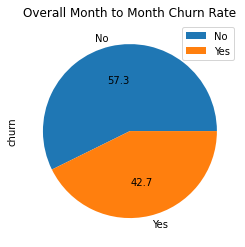

In [188]:
#current status of churn rate for all month to month  customers
churn_df_copy.groupby('churn').churn.count().plot.pie(legend = True, autopct ='%1.1f', title = "Overall Month to Month Churn Rate")

<AxesSubplot:title={'center':'Overall Momth to Month Auto-pay Choice'}, ylabel='churn'>

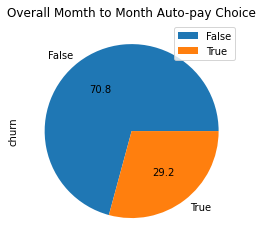

In [189]:
#current status of people who choose auto pay
churn_df_copy.groupby('is_auto').churn.count().plot.pie(legend = True, autopct ='%1.1f', title = "Overall Momth to Month Auto-pay Choice")

<AxesSubplot:title={'center':'Automatic Month to Month Churn Rate'}, ylabel='churn'>

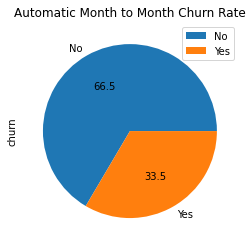

In [190]:
#automatic payment churn rate
churn_df_copy[churn_df_copy['is_auto'] == True].groupby('churn').churn.count().plot.pie(legend = True, autopct ='%1.1f', title = "Automatic Month to Month Churn Rate")

<AxesSubplot:title={'center':'Non Automatic Month to Month Churn Rate'}, ylabel='churn'>

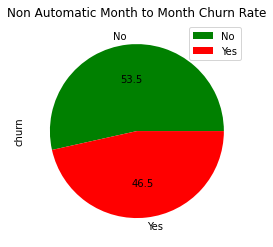

In [191]:
#non-automatic payment churn rate
churn_df_copy[churn_df_copy['is_auto'] == False].groupby('churn').churn.count().plot.pie(legend = True, autopct ='%1.1f', colors = ['green','red'] ,  title = "Non Automatic Month to Month Churn Rate")

In [192]:
#change tenure and total charges columns to int and float respectfully
churn_df_copy.tenure = churn_df_copy.tenure.astype(int)

In [196]:
churn_df_copy.total_charges = churn_df_copy.total_charges.str.replace('$','').str.replace(',','').astype(float)

In [ ]:
#show avg tenure for month to month customers on auto-pay vs non autopay

<AxesSubplot:title={'center':'Average Tenure'}, xlabel='auto pay choice', ylabel='tenure'>

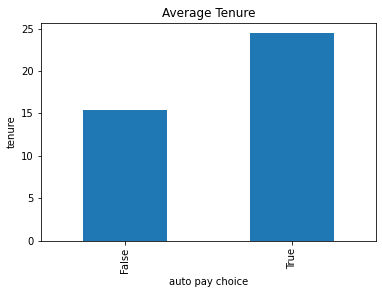

In [204]:
churn_df_copy.groupby('is_auto').tenure.mean().plot.bar( title = "Average Tenure", xlabel = 'auto pay choice' , ylabel = 'tenure')

<AxesSubplot:title={'center':'Total sales for form of payment'}, ylabel='total_charges'>

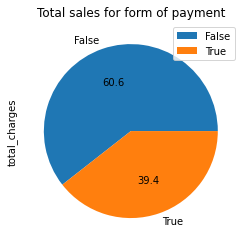

In [210]:
#show how 29% of our month to month customers make up for near 40% of our total income for month to month customers
churn_df_copy.groupby('is_auto').total_charges.sum().plot.pie(legend = True, autopct ='%1.1f' ,  title = "Total sales for form of payment")

In [213]:
#export copy of changes to dataframe to a csv file to use in tableau
churn_df_copy.to_csv('story_telling.csv')